In [1]:
# import the function
from wrfp import getRxnFP

this style of reaction fingerprinting embeds an expert-defined reaction model into its featurization, giving the user the ability to manipulate the manifold by tuning weights corresponding to reactant class defined within the reaction model

In [14]:
import pandas as pd

data = pd.read_csv('updated_out_df-01-14-20.csv')
print([i for i in data.columns])
# reagent classes in this case are Electrophile, Nucleophile, Catalyst, Base, and Solvent
reagent_classes = ['Electrophile', 'Nucleophile', 'Catalyst SMILES', 'Base SMILES', 'Solvent SMILES']

# we need to add a column for the solvent SMILES
solvent_smiles = []
solvent_map = {"NMP":'O=C1N(C)CCC1', "DMSO":'O=S(C)C',"DMF":'O=CN(C)C', \
            "25%H2O_NMP":'[H]O[H].O=C1N(C)CCC1', "25%H2O_DMSO":'O=S(C)C.[H]O[H]', "25%H2O_DMF":'O=CN(C)C.[H]O[H]', \
            "25%tAmOH_DMSO":"CCC(C)(O)C.O=S(C)C","10%tAmOH_NMP":"CCC(C)(O)C.O=C1N(C)CCC1"}
for i in data['Solvent']:
    solvent_smiles.append(solvent_map[i])
data['Solvent SMILES'] = solvent_smiles

['Unnamed: 0', 'Temperature', 'Treatment', 'Plate', 'Row', 'Column', 'Electrophile', 'ElectrophileConc', 'Nucleophile', 'NucleophileConc', 'Product', 'Catalyst', 'Catalyst SMILES', 'CatalystConc', 'Base', 'Base SMILES', 'BaseConc', 'Solvent', 'Analytical Method', 'Output Value', 'Group', 'butina_cluster', 'Reaction Name', 'fpEle000', 'fpEle001', 'fpEle002', 'fpEle003', 'fpEle004', 'fpEle005', 'fpEle006', 'fpEle007', 'fpEle008', 'fpEle009', 'fpEle010', 'fpEle011', 'fpEle012', 'fpEle013', 'fpEle014', 'fpEle015', 'fpEle016', 'fpEle017', 'fpEle018', 'fpEle019', 'fpEle020', 'fpEle021', 'fpEle022', 'fpEle023', 'fpEle024', 'fpEle025', 'fpEle026', 'fpEle027', 'fpEle028', 'fpEle029', 'fpEle030', 'fpEle031', 'fpEle032', 'fpEle033', 'fpEle034', 'fpEle035', 'fpEle036', 'fpEle037', 'fpEle038', 'fpEle039', 'fpEle040', 'fpEle041', 'fpEle042', 'fpEle043', 'fpEle044', 'fpEle045', 'fpEle046', 'fpEle047', 'fpEle048', 'fpEle049', 'fpEle050', 'fpEle051', 'fpEle052', 'fpEle053', 'fpEle054', 'fpEle055', 'fpE

/var/folders/8k/w__0g4xs7rj0xv7hk3dqm71w0000gn/T/ipykernel_4591/3706907009.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('updated_out_df-01-14-20.csv')


In [19]:
#now we're ready to collect our reaction data and do our fingerprinting


# we can manipulate the manifold by dialing the weight knobs
# in this case, the electrophile is set to three
weights = [3, 1, 1, 1, 1]
rfps = []
output_values = []
for i,k in data.iterrows():
    # we only want Suzuki couplings
    if "Suzuki" in k["Reaction Name"]:

        output_value = k["Output Value"]
        # remove outliers
        if output_value > 100:
            continue

        rfp = getRxnFP(k, "Morgan", True, reagent_classes, weights)
        rfps.append(rfp)
        output_values.append(output_value)

print(len(output_values))


2569


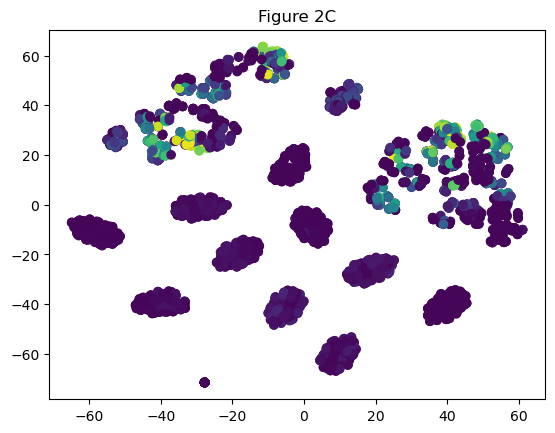

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# we can use t-SNE to visualize the manifold
X = TSNE(n_components=2).fit_transform(np.array(rfps))
plt.title("Figure 2C")
plt.scatter(X[:,0], X[:,1], c=output_values)